Aplicando algoritmo de ML no dataset CIC2018

testando o dataset que foi treinado com CIC IDS 2017

In [1]:
# !pip install scikit-learn
!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from scipy.stats import sem, t
import seaborn as sns

In [ ]:
data = pd.read_csv('path/all_1132_features_mv_entropia_arima_holder_cic2018.csv', low_memory=False)

In [ ]:
colunas_para_dropar = [coluna for coluna in data.columns if 'ARIMA' in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)

In [ ]:
label = data['Label']
data = data.drop(['Label'], axis=1)
data.head()

In [ ]:
features_selected = pd.read_csv('/poseiddon/GROUP B/CONFIGURATION 3/New_feature_selected_holder_arima_features.csv', low_memory=False)

In [ ]:
features = features_selected.columns
print(features)

Index(['Fwd Seg Size Min', 'Active Mean', 'Active Min', 'Dst Port_SMA_6',
       'Dst Port_EMA_6', 'Dst Port_SMA_9', 'Dst Port_EMA_9', 'Dst Port_SMA_12',
       'Dst Port_EMA_12', 'Bwd Pkt Len Max_SMA_3',
       ...
       'PSH Flag Cnt_entropy_j40', 'PSH Flag Cnt_entropy_j50',
       'ACK Flag Cnt_entropy_j10', 'ACK Flag Cnt_entropy_j20',
       'ACK Flag Cnt_entropy_j30', 'ACK Flag Cnt_entropy_j40',
       'ACK Flag Cnt_entropy_j50', 'Fwd Seg Size Min_holder_j5',
       'Active Min_holder_j5', 'Label'],
      dtype='object', length=101)


In [ ]:
data = pd.concat([data, label], axis=1)
data.head()

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,0,36244.0,4434498.0,5.0,4.0,935.0,732.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,59916.0,4367395.0,5.0,4.0,935.0,596.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,443.0,118097840.0,18.0,18.0,865.0,12894.0,232.0,0.0,48.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,59752.0,4555174.0,5.0,3.0,935.0,321.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,37878.0,43546.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
data = data[features]
data.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Fwd Seg Size Min_holder_j5,Active Min_holder_j5,Label
0,32.0,0.0,0.0,36244.00,36244.000000,36244.00,36244.0000,36244.00,36244.000000,366.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,32.0,0.0,0.0,48080.00,43007.428571,48080.00,40978.4000,48080.00,39885.846154,332.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,20.0,270018.0,77763.0,32201.00,30846.163265,32201.00,32871.3200,32201.00,33817.715976,708.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,32.0,0.0,0.0,39088.75,39104.973761,39088.75,38247.4560,39088.75,37807.605826,693.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,32.0,0.0,0.0,38846.60,38754.409829,38846.60,38173.5648,38846.60,37818.435699,593.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
data['Label'].value_counts()

,count
Label,
Benign,139890
DoS attacks-SlowHTTPTest,139890
DoS attacks-Slowloris,10990


In [ ]:
print(data['Label'].value_counts(dropna=False))

Label
Benign                      139890
DoS attacks-SlowHTTPTest    139890
DoS attacks-Slowloris        10990
Name: count, dtype: int64


In [ ]:
data['Label'] = data['Label'].replace(['Benign'], 0)
data['Label'] = data['Label'].replace(['DoS attacks-Slowloris'], 1)
data['Label'] = data['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
data['Label'].value_counts()

/tmp/ipython-input-3391272768.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)


,count
Label,
0,139890
2,139890
1,10990


Text(0.5, 1.02, 'Contagem de Amostras por Classe')

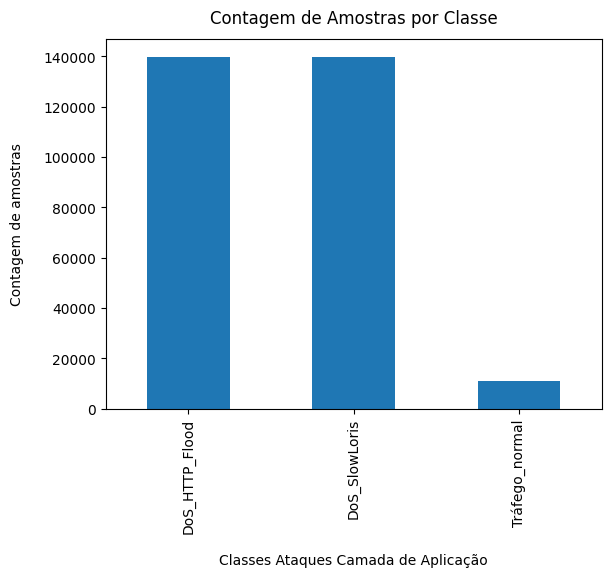

In [ ]:
names = ['Tráfego_normal','DoS_SlowLoris', 'DoS_HTTP_Flood']
classes_show = [names[i - 1] for i in data['Label'].unique()]
index = np.arange(len(classes_show))

df_visualization = data.copy()
df_visualization['Label'] = df_visualization['Label'].apply(lambda x:classes_show[x] )
df_visualization['Label'].value_counts().plot.bar(x = 'count', y = 'Label' )

plt.xlabel("Classes Ataques Camada de Aplicação", labelpad=14)
plt.ylabel("Contagem de amostras", labelpad=14)
plt.title("Contagem de Amostras por Classe", y=1.02)

In [ ]:
y = data['Label']
x = data.drop(['Label'],axis=1)
x.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Fwd Seg Size Min_holder_j5,Active Min_holder_j5
0,32.0,0.0,0.0,36244.00,36244.000000,36244.00,36244.0000,36244.00,36244.000000,366.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,0.0,0.0,48080.00,43007.428571,48080.00,40978.4000,48080.00,39885.846154,332.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,270018.0,77763.0,32201.00,30846.163265,32201.00,32871.3200,32201.00,33817.715976,708.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,0.0,0.0,39088.75,39104.973761,39088.75,38247.4560,39088.75,37807.605826,693.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,0.0,0.0,38846.60,38754.409829,38846.60,38173.5648,38846.60,37818.435699,593.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dt_null = x.isnull().sum()
dt_null

,0
Fwd Seg Size Min,0
Active Mean,0
Active Min,0
Dst Port_SMA_6,0
Dst Port_EMA_6,0
...,...
ACK Flag Cnt_entropy_j30,0
ACK Flag Cnt_entropy_j40,0
ACK Flag Cnt_entropy_j50,0
Fwd Seg Size Min_holder_j5,0


In [ ]:
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model # É o mesmo que tf.keras.models.load_model
import os

In [ ]:
mlp_path = '/poseiddon/GROUP B/CONFIGURATION 3/CICIDS2017_mlp.joblib'
svm_path = '/poseiddon/GROUP B/CONFIGURATION 3/CICIDS2017_svm.joblib'
nb_path = '/poseiddon/GROUP B/CONFIGURATION 3/CICIDS2017_nb.joblib'
dt_path = '/poseiddon/GROUP B/CONFIGURATION 3/CICIDS2017_dt.joblib'
rf_path = '/poseiddon/GROUP B/CONFIGURATION 3/CICIDS2017_rf.joblib'
adb_path = '/poseiddon/GROUP B/CONFIGURATION 3/CICIDS2017_adb.joblib'
modelLSTM = '/poseiddon/GROUP B/CONFIGURATION 3/CICIDS2017_lstm.h5'
model_gru = '/content/drive/MyDrive/Colab Notebooks/Wiley-POSEIDDON/CEN33/CICIDS2017_gru.h5'

mlp = joblib.load(mlp_path)
svm = joblib.load(svm_path)
nb = joblib.load(nb_path)
dt = joblib.load(dt_path)
rf = joblib.load(rf_path)
adb = joblib.load(adb_path)
try:
    lstm = load_model(modelLSTM)
    print("Modelo LSTM carregado com sucesso do arquivo .h5!")
    lstm.summary()
except Exception as e:
    print(f"Erro ao carregar o modelo .h5: {e}")
try:
    gru = load_model(model_gru)
    print("Modelo LSTM carregado com sucesso do arquivo .h5!")
    gru.summary()
except Exception as e:
    print(f"Erro ao carregar o modelo .h5: {e}")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Modelo LSTM carregado com sucesso do arquivo .h5!


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 100, 256)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 100, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 100, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,605 (975.02 KB)

 Trainable params: 248,451 (970.51 KB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 2 (12.00 B)

Modelo LSTM carregado com sucesso do arquivo .h5!


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                    │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,757 (229.52 KB)

 Trainable params: 58,755 (229.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
modelMLP = mlp
svm = svm
nb = nb
modelDT = dt
modelRF = rf
adb = adb

In [ ]:
label = label.replace(['Benign'], 0)
label = label.replace(['DoS attacks-SlowHTTPTest'], 1)
label = label.replace(['DoS attacks-Slowloris'], 2)
label.value_counts()

/tmp/ipython-input-1525930610.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  label = label.replace(['DoS attacks-Slowloris'], 2)


,count
Label,
0,139890
1,139890
2,10990


In [ ]:
predictsMLP = mlp.predict(x)
predictsSVM = svm.predict(x)
predictsNB = nb.predict(x)
predictsDT = dt.predict(x)
predictsRF = rf.predict(x)
predictsADB = adb.predict(x)
predictLSTM = lstm.predict(x)
predictGRU = gru.predict(x)

9087/9087 ━━━━━━━━━━━━━━━━━━━━ 90s 10ms/step
9087/9087 ━━━━━━━━━━━━━━━━━━━━ 146s 16ms/step


In [ ]:
accuracyMLP = accuracy_score(y, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.48495030436427417

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    0.9970    0.9985    139890
           1     0.0108    0.1390    0.0200     10990
           2     0.0006    0.0000    0.0001    139890

    accuracy                         0.4850    290770
   macro avg     0.3371    0.3787    0.3395    290770
weighted avg     0.4818    0.4850    0.4812    290770



In [ ]:
y_test = y

In [ ]:
x_test = x

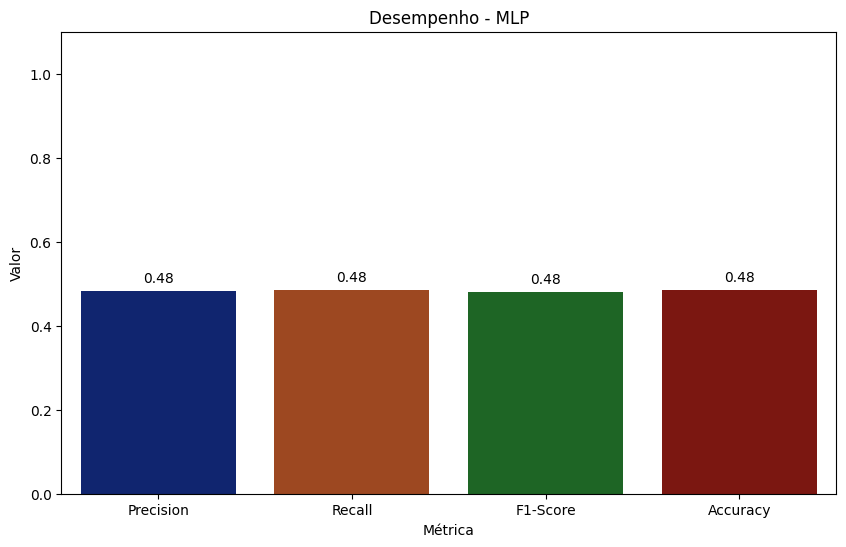

In [ ]:
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

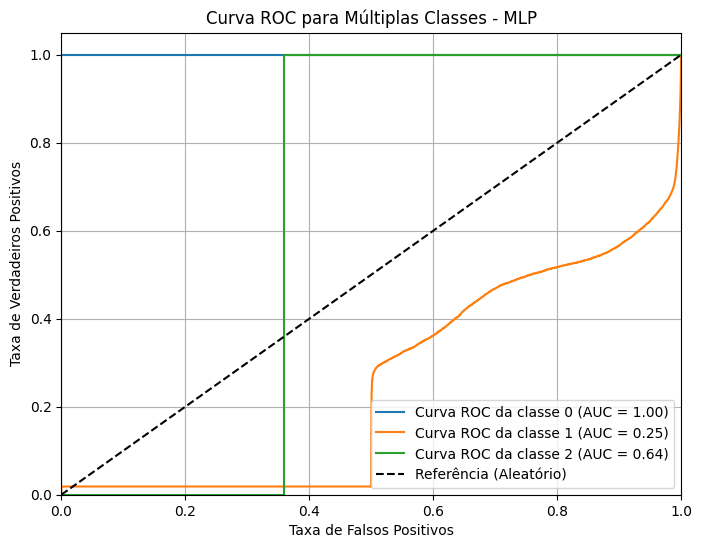

In [ ]:
class_names = modelMLP.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
classes = class_names

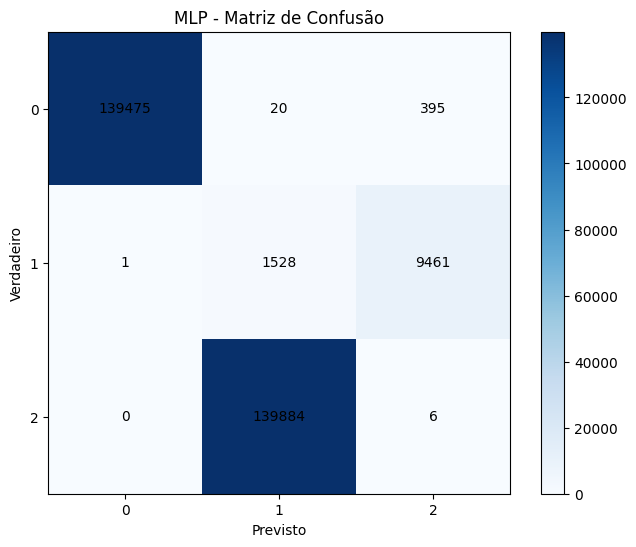

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

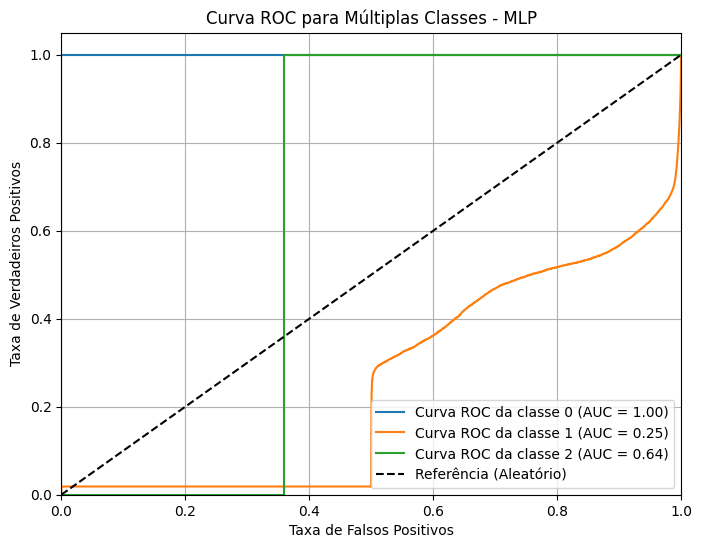

In [ ]:
class_names_mlp = mlp.classes_
y_test_bin = label_binarize(y, classes=class_names_mlp)
n_classes = y_test_bin.shape[1]
y_pred_prob = mlp.predict_proba(x)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_mlp[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

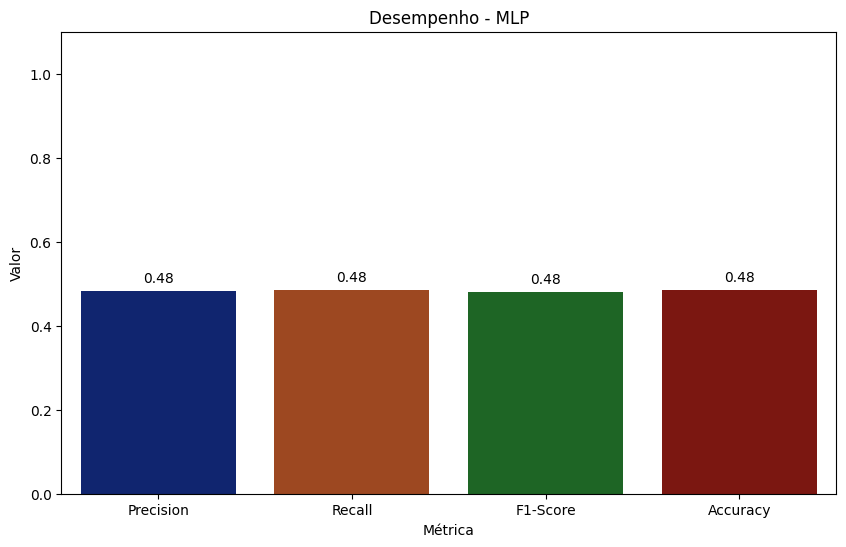

In [ ]:
y_pred = predictsMLP
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

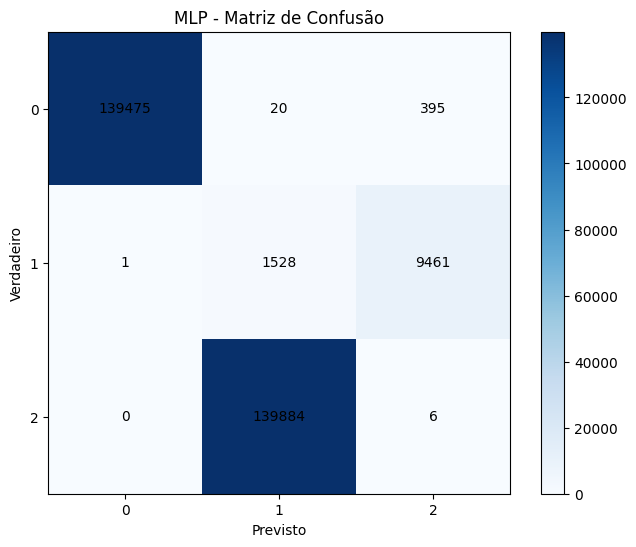

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_mlp)):
    for j in range(len(class_names_mlp)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(class_names_mlp)), labels=class_names_mlp)
plt.yticks(ticks=np.arange(len(class_names_mlp)), labels=class_names_mlp)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

print(classification_report(y, predictsADB))


accuracyadb = accuracy_score(y, predictsADB)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')
reportadb = classification_report(y, predictsADB, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139890
           1       0.00      0.06      0.01     10990
           2       0.00      0.00      0.00    139890

    accuracy                           0.48    290770
   macro avg       0.34      0.35      0.34    290770
weighted avg       0.48      0.48      0.48    290770

Precisão do modelo de AdaBoost: 0.48279052171819653

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9998    0.9987    0.9993    139890
           1     0.0046    0.0592    0.0086     10990
           2     0.0016    0.0001    0.0002    139890

    accuracy                         0.4828    290770
   macro avg     0.3354    0.3527    0.3360    290770
weighted avg     0.4820    0.4828    0.4812    290770



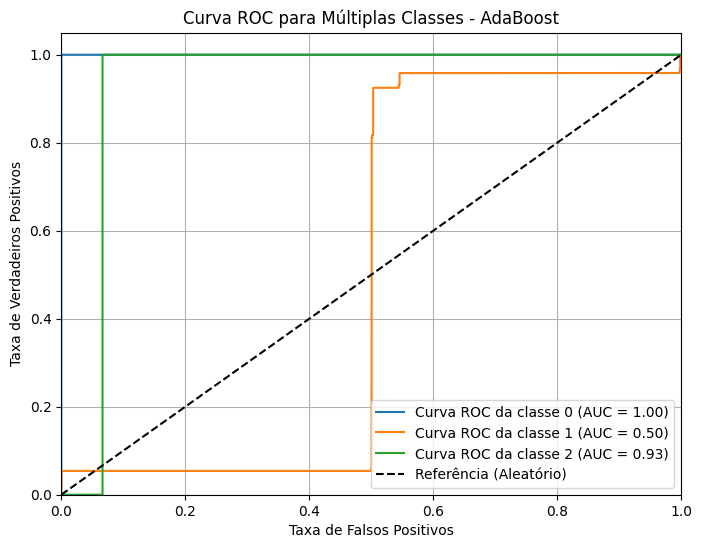

In [ ]:
class_names_adb = adb.classes_
y_test_bin = label_binarize(y, classes=class_names_adb)
n_classes = y_test_bin.shape[1]
y_pred_prob = adb.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_adb[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

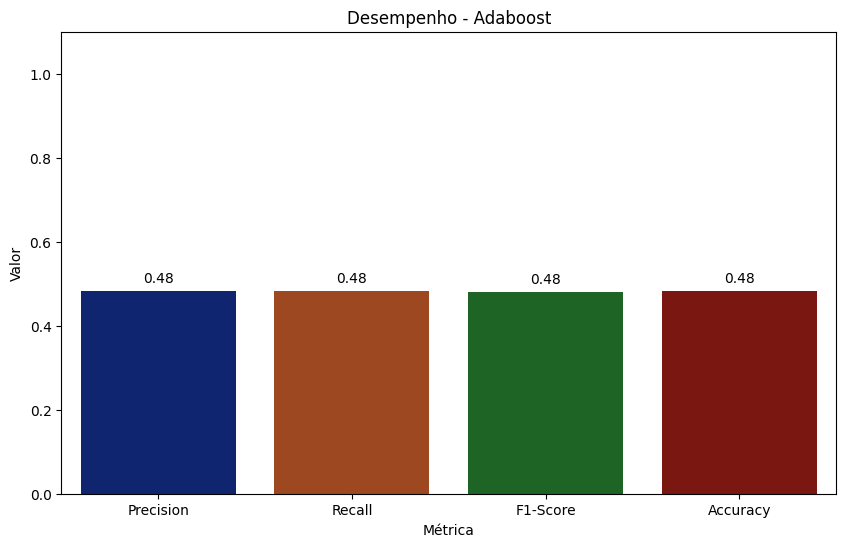

In [ ]:
y_pred = predictsADB
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Adaboost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

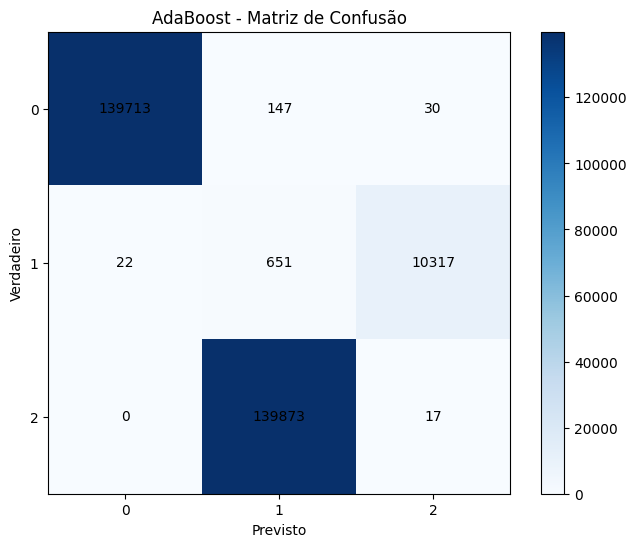

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_adb)):
    for j in range(len(class_names_adb)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(class_names_adb)), labels=class_names_adb)
plt.yticks(ticks=np.arange(len(class_names_adb)), labels=class_names_adb)
plt.show()

In [ ]:
accuracySVM = accuracy_score(y, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')
reportSVM = classification_report(y, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.48123946762045605

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9303    1.0000    0.9639    139890
           1     0.0003    0.0032    0.0005     10990
           2     0.0105    0.0000    0.0001    139890

    accuracy                         0.4812    290770
   macro avg     0.3137    0.3344    0.3215    290770
weighted avg     0.4526    0.4812    0.4638    290770



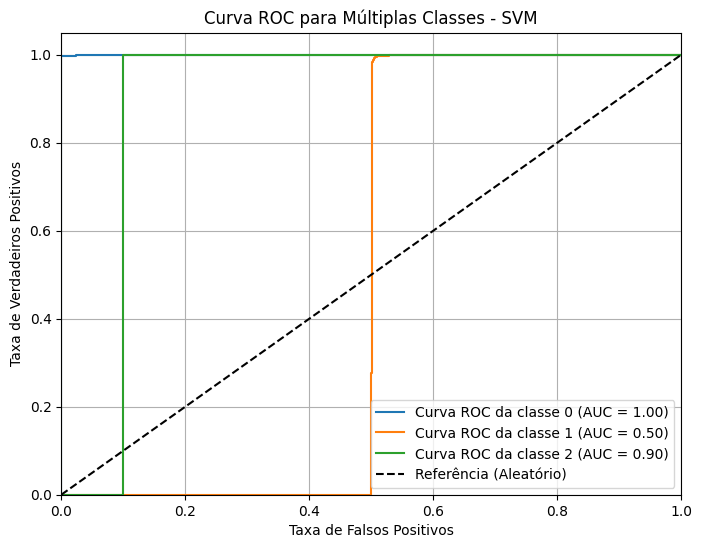

In [ ]:
class_names_svm = svm.classes_
y_test_bin = label_binarize(y, classes=class_names_svm)
n_classes = y_test_bin.shape[1]
y_pred_prob = svm.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_svm[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

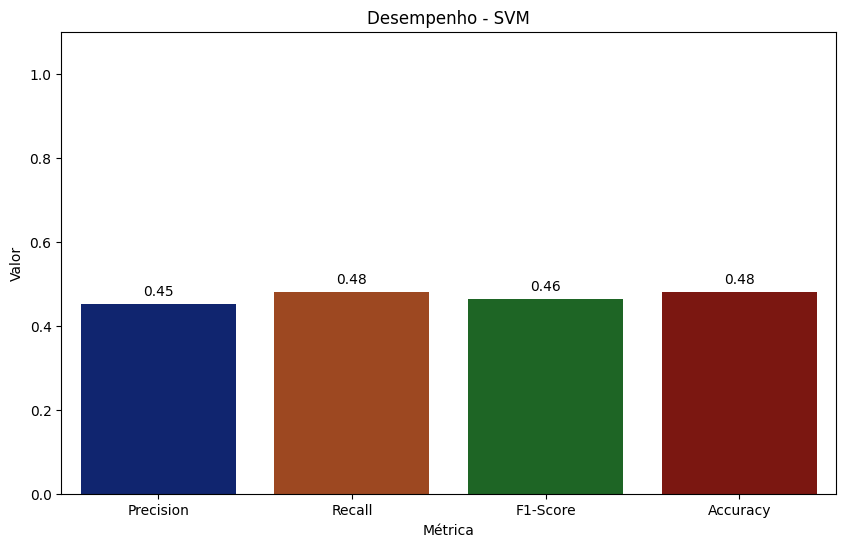

In [ ]:
# Calcular as métricas
y_pred = predictsSVM
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

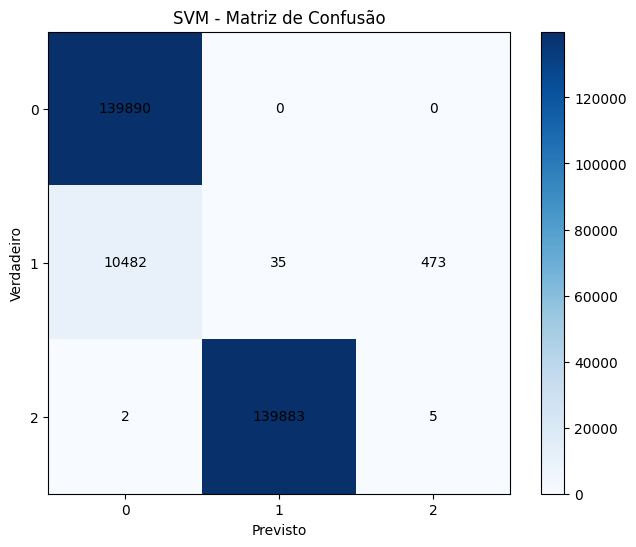

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_svm)):
    for j in range(len(class_names_svm)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_svm)), labels=class_names_svm)
plt.yticks(ticks=np.arange(len(class_names_svm)), labels=class_names_svm)
plt.show()

In [ ]:
accuracyRF = accuracy_score(y, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.48212332771606425

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9999    1.0000    1.0000    139890
           1     0.0021    0.0266    0.0039     10990
           2     0.0007    0.0001    0.0001    139890

    accuracy                         0.4821    290770
   macro avg     0.3342    0.3422    0.3346    290770
weighted avg     0.4815    0.4821    0.4813    290770



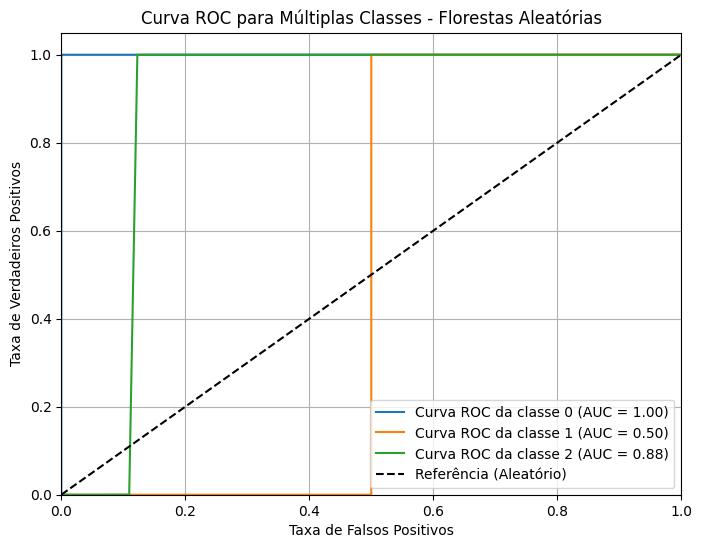

In [ ]:
class_names_rf = rf.classes_
y_test_bin = label_binarize(y, classes=class_names_rf)
n_classes = y_test_bin.shape[1]
y_pred_prob = rf.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_rf[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

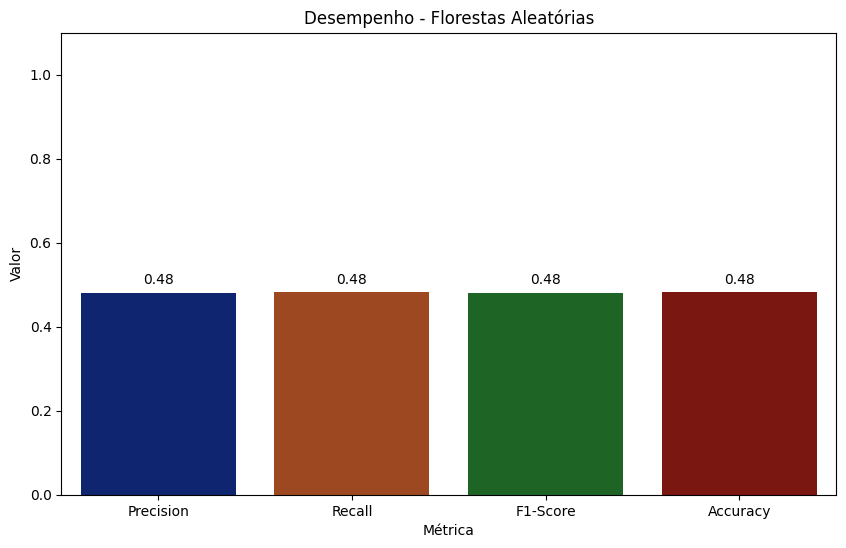

In [ ]:
y_pred = predictsRF
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Florestas Aleatórias')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

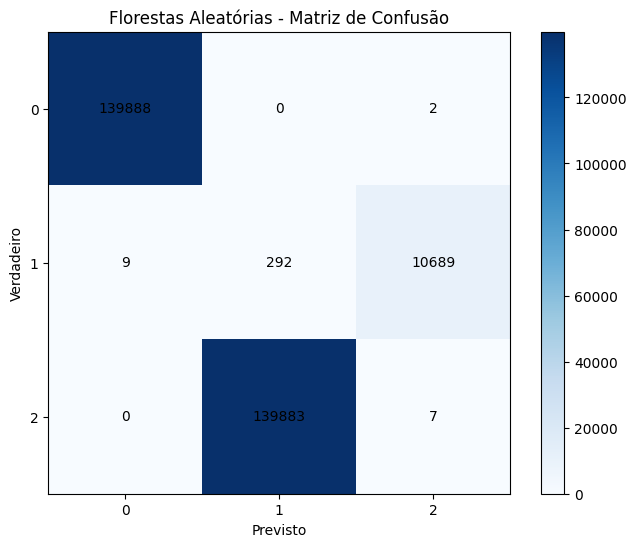

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_rf)):
    for j in range(len(class_names_rf)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Florestas Aleatórias - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(class_names_rf)), labels=class_names_rf)
plt.yticks(ticks=np.arange(len(class_names_rf)), labels=class_names_rf)
plt.show()

In [ ]:
accuracyDT = accuracy_score(y, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.5021701000791003

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9999    0.9834    0.9916    139890
           1     0.0568    0.7684    0.1058     10990
           2     0.0011    0.0000    0.0001    139890

    accuracy                         0.5022    290770
   macro avg     0.3526    0.5839    0.3658    290770
weighted avg     0.4838    0.5022    0.4811    290770



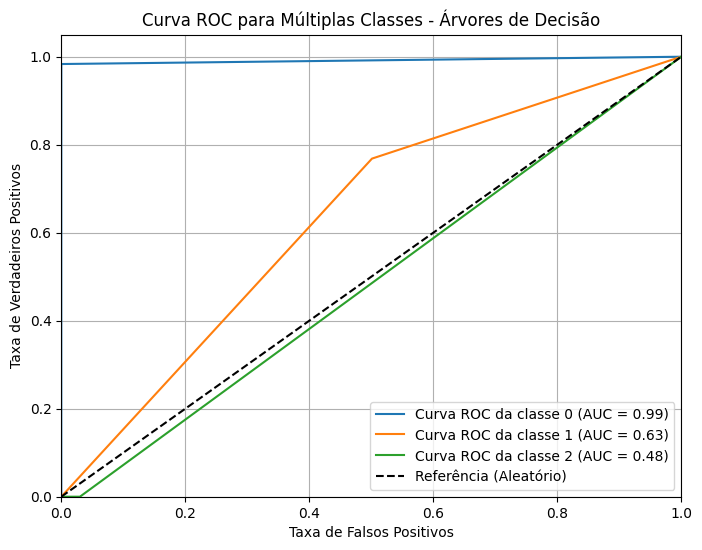

In [ ]:
class_names_dt = dt.classes_
y_test_bin = label_binarize(y, classes=class_names_dt)
n_classes = y_test_bin.shape[1]
y_pred_prob = dt.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_dt[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Árvores de Decisão')
plt.legend(loc="lower right")
plt.grid()
plt.show()

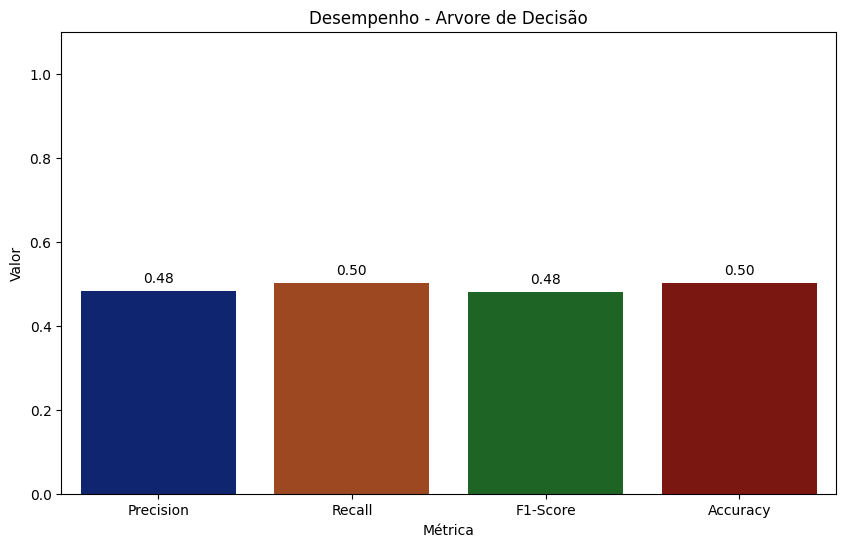

In [ ]:
y_pred = predictsDT
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

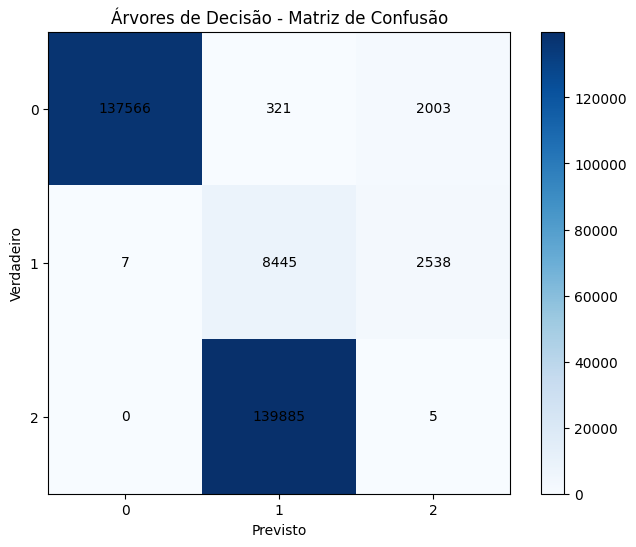

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_dt)):
    for j in range(len(class_names_dt)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_dt)), labels=class_names_dt)
plt.yticks(ticks=np.arange(len(class_names_dt)), labels=class_names_dt)
plt.show()

In [ ]:
accuracyNB = accuracy_score(y, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.4815077208790453

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.4813    0.9999    0.6498    139890
           1     0.9214    0.0117    0.0232     10990
           2     0.0000    0.0000    0.0000    139890

    accuracy                         0.4815    290770
   macro avg     0.4676    0.3372    0.2243    290770
weighted avg     0.2664    0.4815    0.3135    290770



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


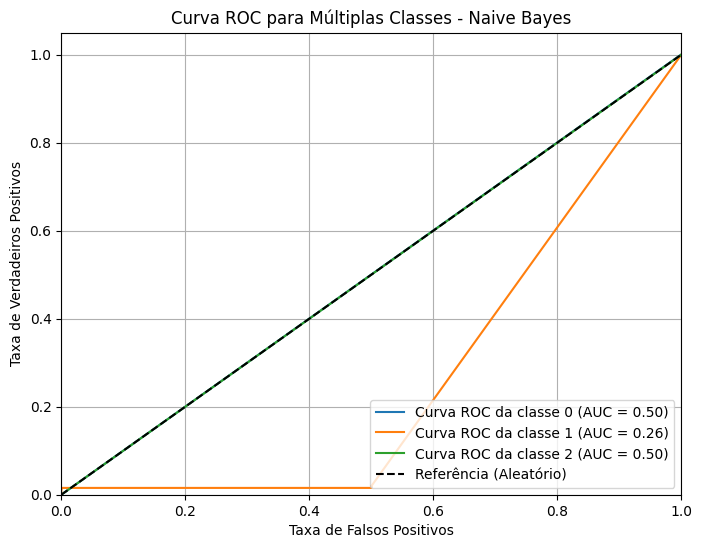

In [ ]:
class_names_nb = nb.classes_
y_test_bin = label_binarize(y, classes=class_names_nb)
n_classes = y_test_bin.shape[1]
y_pred_prob = nb.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_nb[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


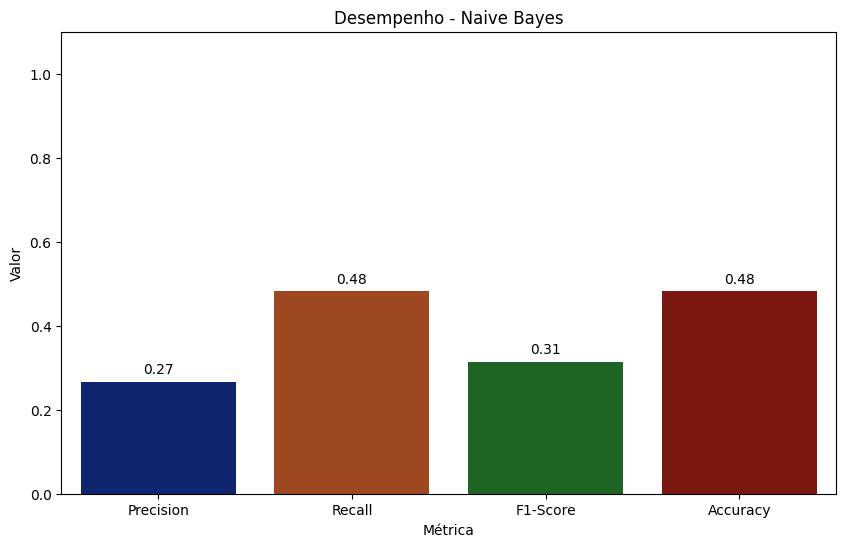

In [ ]:
y_pred = predictsNB
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

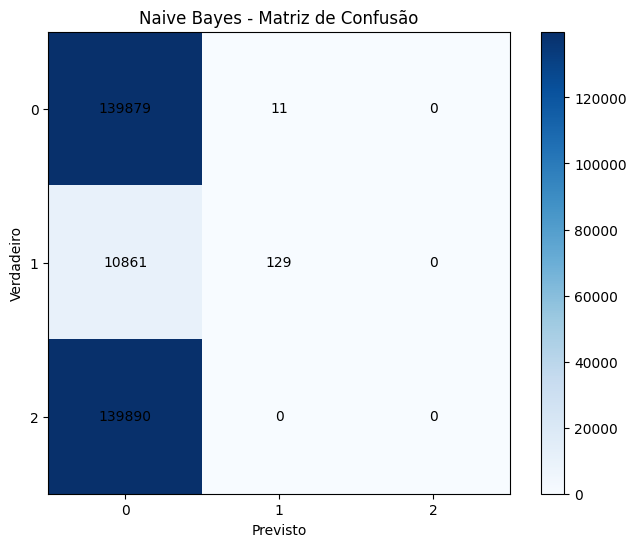

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_nb)):
    for j in range(len(class_names_nb)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Naive Bayes - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(class_names_nb)), labels=class_names_nb)
plt.yticks(ticks=np.arange(len(class_names_nb)), labels=class_names_nb)
plt.show()

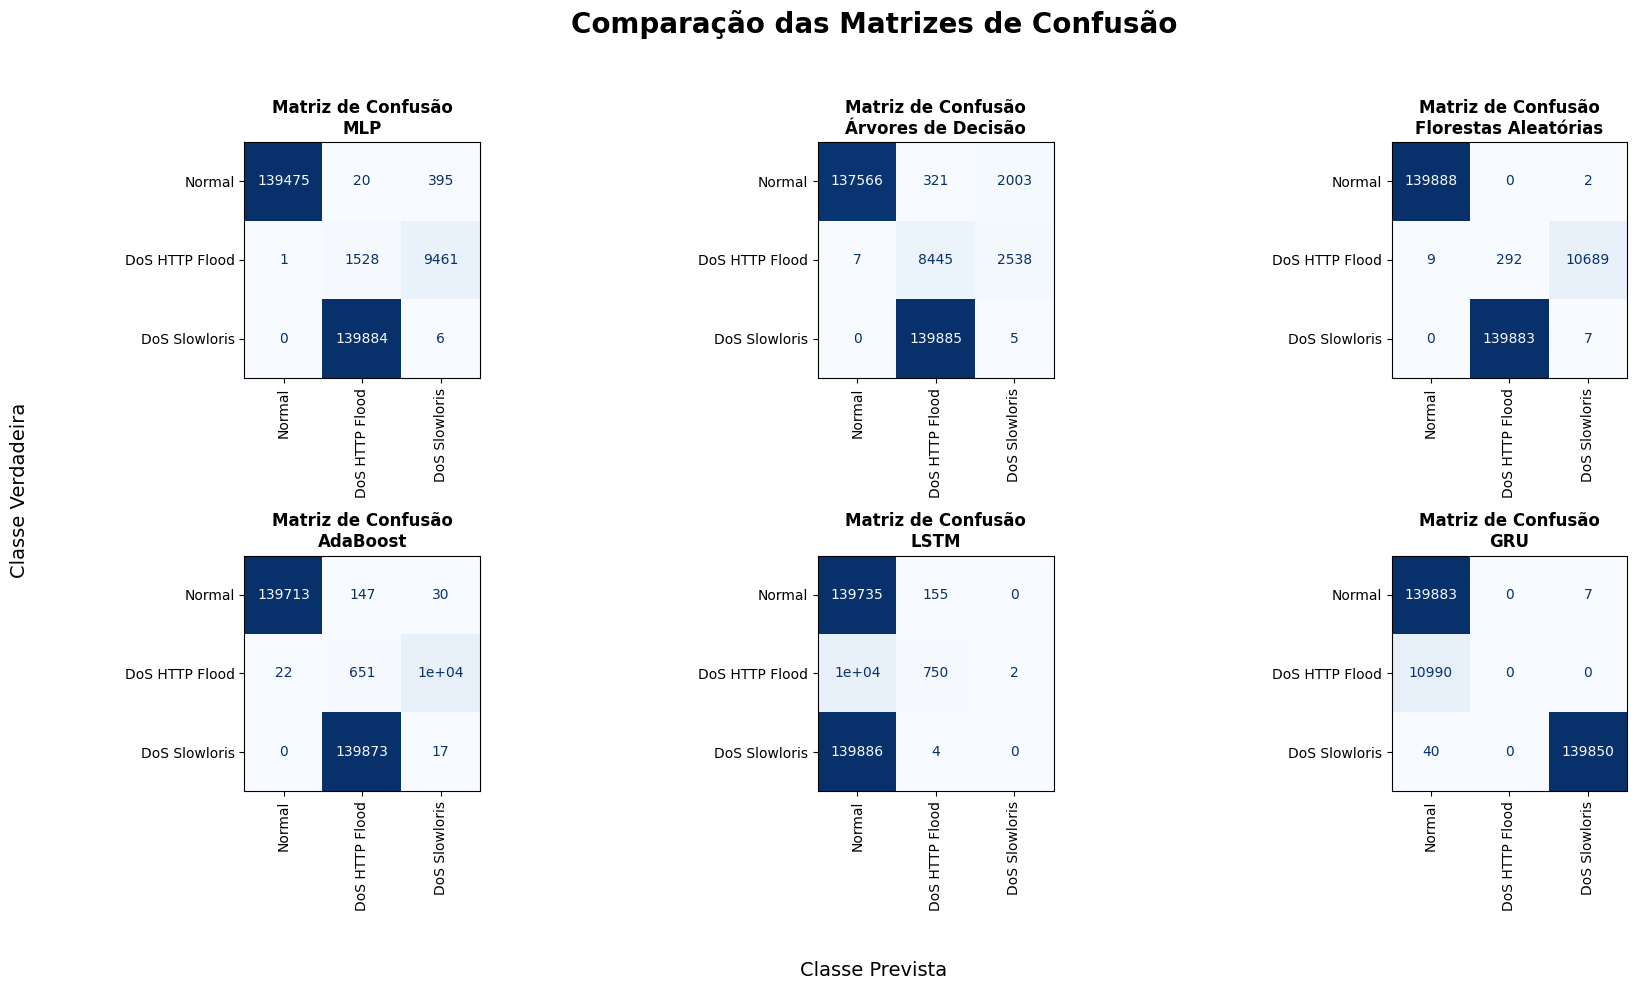

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "MLP": mlp,
    "Árvores de Decisão": dt,
    "Florestas Aleatórias": rf,
    "AdaBoost": adb,
    "LSTM": lstm, 
    "GRU": gru    
}

nomes_classes = ['Normal', 'DoS HTTP Flood', 'DoS Slowloris']
unique_labels = sorted(y.unique())

predicoes = {}
for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_proba = modelo.predict(x, verbose=0)
        predicoes[nome] = np.argmax(y_pred_proba, axis=1)
    else:
        predicoes[nome] = modelo.predict(x)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):
    cm = confusion_matrix(y, predicoes[nome_modelo], labels=unique_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    ax.set_title(f"Matriz de Confusão\n{nome_modelo}", fontweight='bold')

    ax.set_xlabel('')
    ax.set_ylabel('')

fig.supxlabel('Classe Prevista', fontsize=14)
fig.supylabel('Classe Verdadeira', fontsize=14)

plt.suptitle("Comparação das Matrizes de Confusão", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparacao_matrizes_confusao.png') 
plt.show()

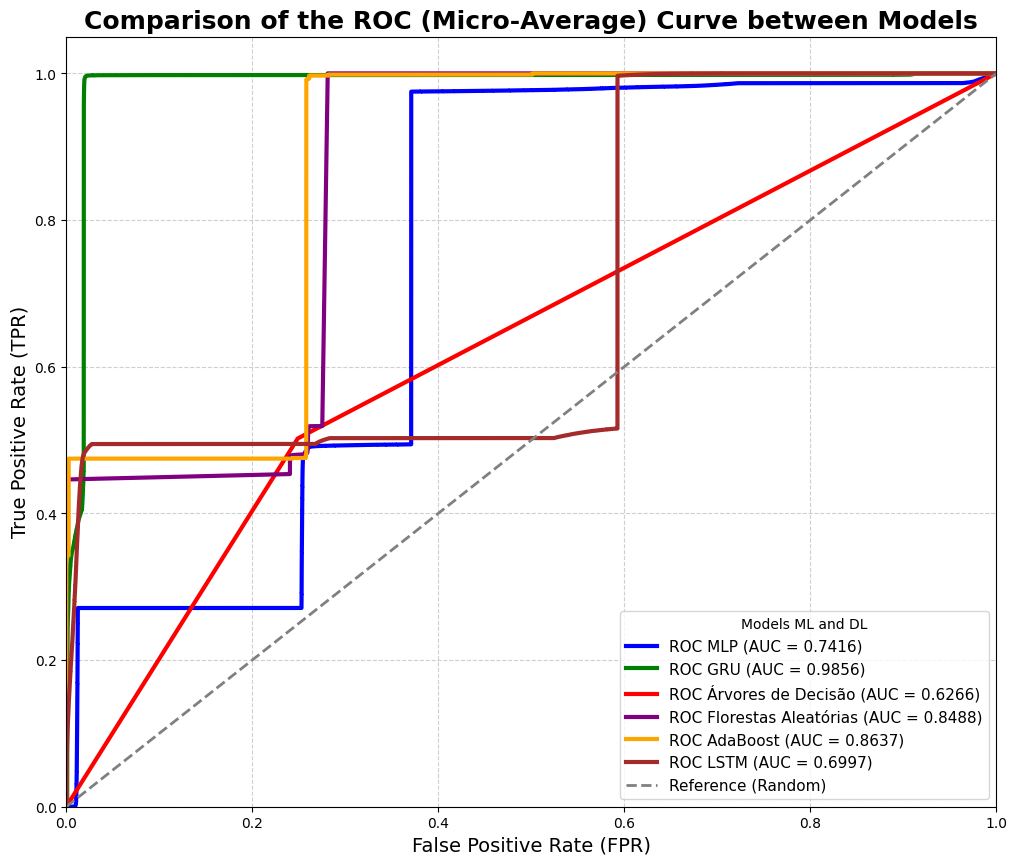

In [ ]:
x_test_sklearn = x
x_test_lstm = x
y_test_reais = y_test 
class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)
n_classes = len(class_names)

modelos = {
    "MLP": modelMLP,
    "GRU": gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": lstm,
}

plt.figure(figsize=(12, 10))
cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        print(f"Aviso: O modelo {nome_modelo} foi ignorado (sem método de probabilidades).")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)],
        lw=3,
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})'
    )

plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')
plt.legend(loc="lower right", fontsize=11, title="Models ML and DL")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/tmp/ipython-input-972812353.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)
/tmp/ipython-input-972812353.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)
/tmp/ipython-input-972812353.py:83: FutureWarning

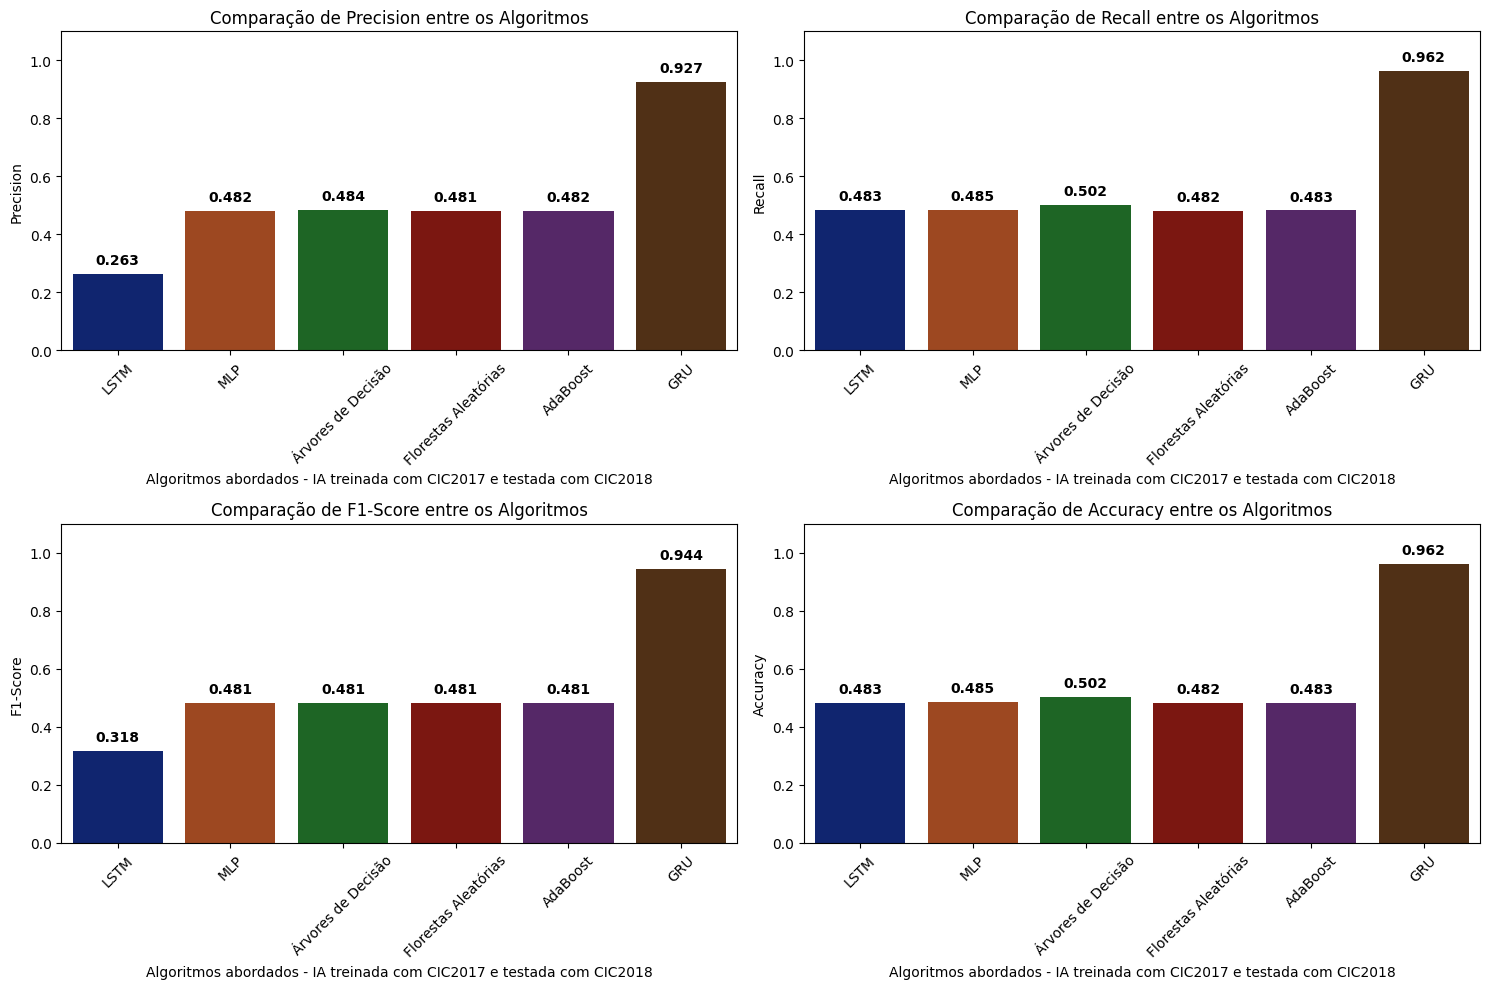

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.stats import sem, t
import seaborn as sns

if predictLSTM.ndim > 1 and predictLSTM.shape[1] > 1:
    predictLSTM_labels = np.argmax(predictLSTM, axis=1)
else:
    predictLSTM_labels = predictLSTM

if predictGRU.ndim > 1 and predictGRU.shape[1] > 1:
    predictGRU_labels = np.argmax(predictGRU, axis=1)
else:
    predictGRU_labels = predictGRU

resultados = {
    "Algoritmo": ["LSTM", "MLP", "Árvores de Decisão", "Florestas Aleatórias", "AdaBoost", "GRU"],
    "Precision": [precision_score(y, predictLSTM_labels, average='weighted'), 
                  precision_score(y, predictsMLP, average='weighted'),
                  precision_score(y, predictsDT, average='weighted'),
                  precision_score(y, predictsRF, average='weighted'),
                  precision_score(y, predictsADB, average='weighted'),
                  precision_score(y, predictGRU_labels, average='weighted')], 
    "Recall": [recall_score(y, predictLSTM_labels, average='weighted'),
               recall_score(y, predictsMLP, average='weighted'),
               recall_score(y, predictsDT, average='weighted'),
               recall_score(y, predictsRF, average='weighted'),
               recall_score(y, predictsADB, average='weighted'),
               recall_score(y, predictGRU_labels, average='weighted')],
    "F1-Score": [f1_score(y, predictLSTM_labels, average='weighted'),
                 f1_score(y, predictsMLP, average='weighted'),
                 f1_score(y, predictsDT, average='weighted'),
                 f1_score(y, predictsRF, average='weighted'),
                 f1_score(y, predictsADB, average='weighted'),
                 f1_score(y, predictGRU_labels, average='weighted')],
    "Accuracy": [accuracy_score(y, predictLSTM_labels),
                 accuracy_score(y, predictsMLP),
                 accuracy_score(y, predictsDT),
                 accuracy_score(y, predictsRF),
                 accuracy_score(y, predictsADB),
                 accuracy_score(y, predictGRU_labels)]
}

df_resultados = pd.DataFrame(resultados)
df_resultados = pd.DataFrame(resultados)

def calcular_intervalo_confianca(dados):
    n = len(dados)
    if n < 2:
        return 0  
    erro_padrao = sem(dados)
    t_critico = t.ppf(0.975, n - 1)  
    intervalo = t_critico * erro_padrao
    return intervalo

metricas = ["Precision", "Recall", "F1-Score", "Accuracy"]

plt.figure(figsize=(15, 10))

for i, metrica in enumerate(metricas, 1):
    plt.subplot(2, 2, i)

    ic_95 = np.array([calcular_intervalo_confianca(df_resultados[metrica]) for _ in range(len(df_resultados))])

    ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)

    for j, p in enumerate(ax.patches):
        valor = p.get_height()

        ax.annotate(f'{valor:.3f}',
                    (p.get_x() + p.get_width() / 2., valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')

    plt.title(f"Comparação de {metrica} entre os Algoritmos")
    plt.ylim(0, 1.1)
    plt.xlabel("Algoritmos abordados - IA treinada com CIC2017 e testada com CIC2018")
    plt.ylabel(metrica)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import time
import numpy as np

def calcular_tempo_inferencia(modelo, dados_para_teste):

  modelo.predict(dados_para_teste[:1])

  tempos = []
  for _ in range(100): 
      inicio = time.perf_counter()
      modelo.predict(dados_para_teste)
      fim = time.perf_counter()
      tempos.append(fim - inicio)

  tempo_medio_lote_ms = np.mean(tempos) * 1000
  tempo_por_previsao_ms = tempo_medio_lote_ms / len(dados_para_teste)

  return tempo_por_previsao_ms

In [ ]:
from tqdm.notebook import tqdm # Ou from tqdm import tqdm

dicionario_modelos = {
    "MLP": modelMLP,
    "GRU": gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": lstm,
}


amostra_para_teste = x[:1000]

tempos_resultados = {}
for nome_modelo, objeto_modelo in tqdm(dicionario_modelos.items()):
    print(f"Calculando tempo para o modelo: {nome_modelo}...")

    tempo_ms = calcular_tempo_inferencia(objeto_modelo, amostra_para_teste)

    tempos_resultados[nome_modelo] = tempo_ms

    print(f"-> Tempo por previsão: {tempo_ms:.6f} ms\n")

print("\n--- Dicionário Final com os Tempos de Inferência ---")
print(tempos_resultados)

  0%|          | 0/6 [00:00<?, ?it/s]

Calculando tempo para o modelo: MLP...
-> Tempo por previsão: 0.017696 ms

Calculando tempo para o modelo: GRU...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━

In [ ]:
df_tempos = pd.DataFrame(list(tempos_resultados.items()), columns=['Model', 'Model Inference (ms)'])
df_tempos = df_tempos.sort_values(by='Model Inference (ms)', ascending=True)

In [ ]:
df_tempos.to_csv('/poseiddon/GROUP B/CONFIGURATION 3/tempos_deteccao_cic2018.csv', index=False)

/tmp/ipython-input-3464862802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


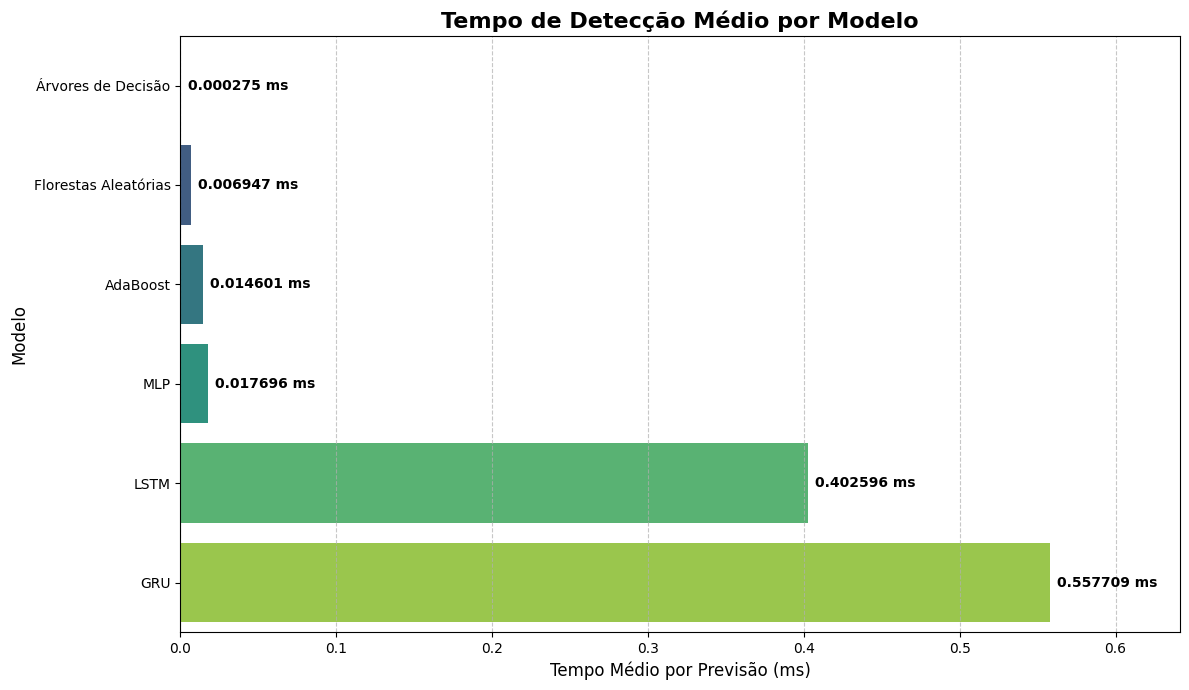

In [ ]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='Model Inference (ms)',
    y='Model',
    data=df_tempos,
    palette='viridis',
    orient='h' 
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.6f} ms',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.title('Tempo de Detecção Médio por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Tempo Médio por Previsão (ms)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlim(0, df_tempos['Model Inference (ms)'].max() * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
df_resultados.rename(columns={'Algoritmo': 'Algorithm'}, inplace=True)
df_resultados.head()

,Algorithm,Precision,Recall,F1-Score,Accuracy
0,LSTM,0.263114,0.483148,0.317630,0.483148
1,MLP,0.481799,0.484950,0.481182,0.484950
2,Árvores de Decisão,0.483754,0.502170,0.481092,0.502170
3,Florestas Aleatórias,0.481464,0.482123,0.481274,0.482123
4,AdaBoost,0.481990,0.482791,0.481193,0.482791


In [ ]:
df_times = df_tempos.copy()
df_times.head()

,Model,Model Inference (ms)
2,Árvores de Decisão,0.000275
3,Florestas Aleatórias,0.006947
4,AdaBoost,0.014601
0,MLP,0.017696
5,LSTM,0.402596


In [ ]:
nova_sequencia = ['LSTM', 'MLP', 'Árvores de Decisão', 'Florestas Aleatórias', 'AdaBoost', 'GRU']
model_category = pd.CategoricalDtype(nova_sequencia, ordered=True)
df_times['Model'] = df_times['Model'].astype(model_category)

In [ ]:
df_reordenado = df_times.sort_values('Model')
df_reordenado.head(10)

,Model,Model Inference (ms)
5,LSTM,0.402596
0,MLP,0.017696
2,Árvores de Decisão,0.000275
3,Florestas Aleatórias,0.006947
4,AdaBoost,0.014601
1,GRU,0.557709


In [ ]:
df_reordenado = df_reordenado.reset_index(drop=True)
df_reordenado.head(10)

,Model,Model Inference (ms)
0,LSTM,0.402596
1,MLP,0.017696
2,Árvores de Decisão,0.000275
3,Florestas Aleatórias,0.006947
4,AdaBoost,0.014601
5,GRU,0.557709


In [ ]:
data = pd.concat([df_resultados, df_reordenado['Model Inference (ms)']], axis=1)
data.head(10)

,Algorithm,Precision,Recall,F1-Score,Accuracy,Model Inference (ms)
0,LSTM,0.263114,0.483148,0.317630,0.483148,0.402596
1,MLP,0.481799,0.484950,0.481182,0.484950,0.017696
2,Árvores de Decisão,0.483754,0.502170,0.481092,0.502170,0.000275
3,Florestas Aleatórias,0.481464,0.482123,0.481274,0.482123,0.006947
4,AdaBoost,0.481990,0.482791,0.481193,0.482791,0.014601
5,GRU,0.927017,0.962042,0.943863,0.962042,0.557709


In [ ]:
data.insert(0, 'Configuration', 'Configuration 3')
data.head()

,Configuration,Algorithm,Precision,Recall,F1-Score,Accuracy,Model Inference (ms)
0,Configuration 3,LSTM,0.263114,0.483148,0.317630,0.483148,0.402596
1,Configuration 3,MLP,0.481799,0.484950,0.481182,0.484950,0.017696
2,Configuration 3,Árvores de Decisão,0.483754,0.502170,0.481092,0.502170,0.000275
3,Configuration 3,Florestas Aleatórias,0.481464,0.482123,0.481274,0.482123,0.006947
4,Configuration 3,AdaBoost,0.481990,0.482791,0.481193,0.482791,0.014601


In [ ]:
data.to_csv('/poseiddon/GROUP B/CONFIGURATION 3/all_results_cic2018_conf03.csv')